In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
COLORS = [
    'b',
    'r',
    'g',
]

In [3]:
name = 'D12_001015'
SPECIES_COUNT = 2

In [4]:
f = open('{}.dis.csv'.format(name))
lines = f.readlines()
S1 = lines[0::SPECIES_COUNT]
S2 = lines[1::SPECIES_COUNT]

f = open('{}.dat.csv'.format(name))
lines = f.readlines()[1:]
N1 = []
N2 = []
#N3 = []
numbers = []
for st in lines:
    sts = st.split()
    numbers.append(int(sts[0]))
    N1.append(float(sts[1]))
    N2.append(float(sts[2]))
    #N3.append(float(sts[3]))

In [5]:
def get_points(s, i):
    return list(map(float, s[i].split()))

In [6]:
max(get_points(S1, 0))

199.9503

In [7]:
def plot_hist(i, num = 25):
    plt.hist([get_points(S1, i), get_points(S2, i)], num, alpha=0.7)

In [8]:
def plot_sidt(i, fig):
    space = 0.1
    spacing = 0.005
    scatter_size_y = 0.35
    hist_size_y = 1 - 2 * space - spacing - scatter_size_y
    width = 1 - 2 * space
    xlim = [0, 200]
    ylim = [0, 0.012]
    
    rect_dist = [
        space,
        space + scatter_size_y + spacing,
        width,
        hist_size_y
    ]
    
    rect_scatter = [
        space,
        space,
        width,
        scatter_size_y,
    ]
    
    ax_dist = fig.add_axes(
        rect_dist,
        #title='Event: {}'.format(numbers[i]),
        xlim=xlim,
        ylim=ylim,
    )
    ax_scatter = fig.add_axes(
        rect_scatter,
        xlim=xlim,
        #ylim=[-3, 3],
    )
    
    kwd = {
        'ax': ax_dist,
        'shade': True,
        'bw': 0.07,
    }
    X = [
        get_points(S1, i),
        get_points(S2, i),
        #get_points(S3, i),
    ]
    sns.kdeplot(X[0], color=COLORS[0], label='$N_1$ = {}'.format(N1[i]), **kwd)
    sns.kdeplot(X[1], color=COLORS[1], label='$N_2$ = {}'.format(N2[i]), **kwd)
    #sns.kdeplot(X[2], color=colors[2], label='$N_3$ = {}'.format(N3[i]), **kwd)
    ax_dist.legend()

    ax_dist.tick_params(
        labelbottom=False,
    )
    ax_scatter.tick_params(
        labelleft=False,
    )
    ax_dist.set_ylabel('Плотность')
    ax_scatter.set_xlabel('Координата')
    for j in range(len(X)):
        ax_scatter.scatter(X[j], np.random.random(len(X[j])), c=COLORS[j], alpha=1, s=0.1)

c:\users\zelen\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.07 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


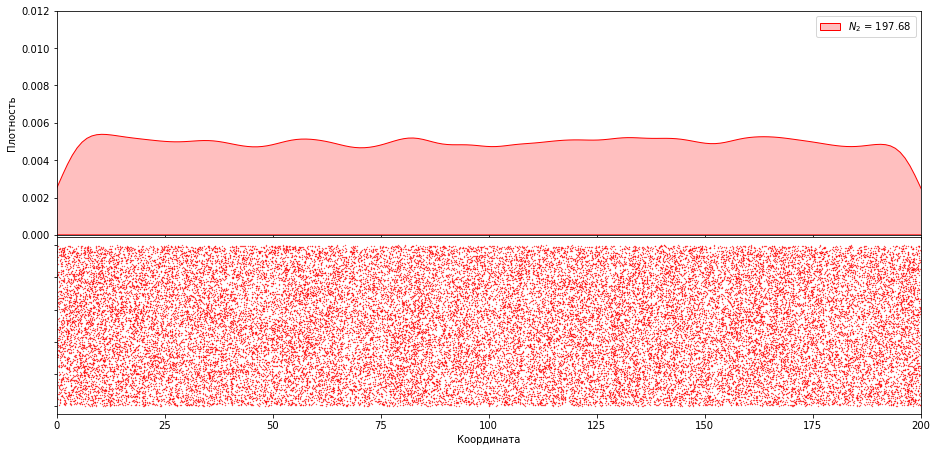

In [9]:
fig = plt.figure(figsize=[15, 7])
plot_sidt(-2, fig)
plt.savefig('_'.join([name, 'DIST.png']), dpi=300, pad_inches=0, bbox_inches='tight')

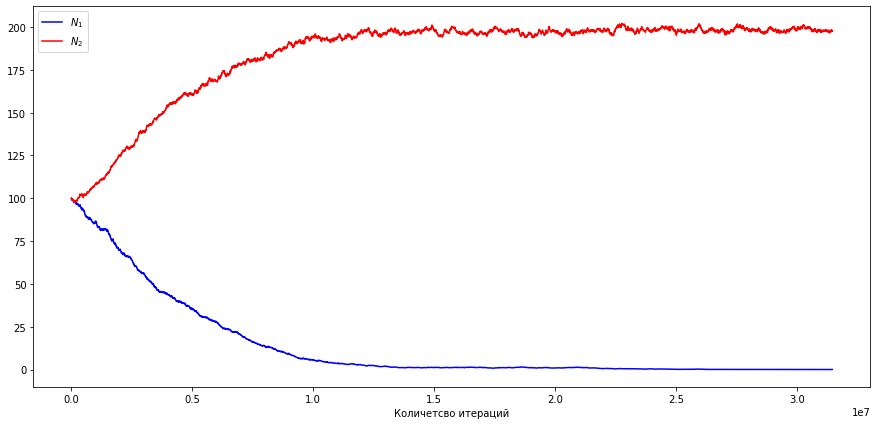

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(numbers, N1, color=COLORS[0], label='$N_1$')
plt.plot(numbers, N2, color=COLORS[1], label='$N_2$')
#plt.plot(numbers, N3, color='b', label='$N_3$')
#plt.plot(numbers, [65.851] * len(numbers), label='Numeric')
plt.xlabel('Количетсво итераций')
plt.legend()
plt.savefig('_'.join([name, 'GRAPH.png']), dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()

In [28]:
N1[-1]

0.0

In [13]:
from matplotlib.animation import FuncAnimation

kwd = {
    'norm_hist': False,
    'rug': False,
}

fig = plt.figure(figsize=[30, 14])
#ax = plt.axes(xlim=(0, 50), ylim=(0, 0.14))

def init():
    plt.clf()

    
def func(i):
    fig.clf()
    plot_sidt(i, fig)

frames = len(numbers)
#frames = 1

progress = tqdm(
    total=frames,
    unit='frame',
)
    
anim = FuncAnimation(
    fig,
    func,
    init_func=init,
    frames=frames,
    interval=100,
    #repeat_delay=1000,
    cache_frame_data=False,
)

def progress_func(i, n):
    progress.update()

anim.save('{}.mp4'.format(name), progress_callback=progress_func)

progress.close()

100%|██████████| 2049/2049 [06:59<00:00,  4.89frame/s]


<Figure size 2160x1008 with 0 Axes>

In [11]:
progress.close()
progress.clear()

In [12]:
print(len(numbers))

2049
